In [10]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from matplotlib import pyplot as plt
import seaborn as sns
import datetime

In [2]:
def load_data(data_dir):
    data = []
    labels = []
    for label, class_name in enumerate(['ripe', 'unripe']):
        class_dir = os.path.join(data_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.csv'):
                file_path = os.path.join(class_dir, filename)
                csv_data = pd.read_csv(file_path).values.flatten()
                data.append(csv_data)
                labels.append(label)
    return np.array(data), np.array(labels)

In [3]:
data_dir = 'dataset'
data, labels = load_data(data_dir)
# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
max_len = max(map(len, data))
data = np.array([np.pad(d, (0, max_len - len(d)), 'constant') for d in data])

In [4]:
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(max_len, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
# model = Sequential([
#  Conv1D(32, kernel_size=3, activation='relu', input_shape=(max_len, 1)),
#  Conv1D(16, kernel_size=3, activation='relu'),
#  Conv1D(16, kernel_size=3, activation='relu'),
#  Conv1D(16, kernel_size=3, activation='relu'),
#  Conv1D(16, kernel_size=3, activation='relu'),
#  Dropout(0.5),
#  MaxPooling1D(pool_size=16),
#  Flatten(),
#  Dense(100, activation='relu'),
#  Dense(75, activation='relu'),
#  Dense(50, activation='relu'),
#  Dense(25, activation='relu'),
#  Dense(1, activation='sigmoid'),
# ])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 28, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 14, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6, 128)            0         
 g1D)                                                            
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 128)               9

In [5]:
data = data.reshape((data.shape[0], data.shape[1], 1))
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 3s 281ms/step - loss: 0.6977 - accuracy: 0.4500 - val_loss: 0.6941 - val_accuracy: 0.4375
Epoch 2/100
2/2 [==============================] - 0s 47ms/step - loss: 0.6898 - accuracy: 0.5500 - val_loss: 0.6943 - val_accuracy: 0.4375
Epoch 3/100
2/2 [==============================] - 0s 51ms/step - loss: 0.6805 - accuracy: 0.5500 - val_loss: 0.6940 - val_accuracy: 0.4375
Epoch 4/100
2/2 [==============================] - 0s 60ms/step - loss: 0.6772 - accuracy: 0.5167 - val_loss: 0.6956 - val_accuracy: 0.4375
Epoch 5/100
2/2 [==============================] - 0s 80ms/step - loss: 0.6778 - accuracy: 0.5500 - val_loss: 0.6959 - val_accuracy: 0.4375
Epoch 6/100
2/2 [==============================] - 0s 98ms/step - loss: 0.6476 - accuracy: 0.6000 - val_loss: 0.6972 - val_accuracy: 0.4375
Epoch 7/100
2/2 [==============================] - 0s 123ms/step - loss: 0.6413 - accuracy: 0.5833 - val_loss: 0.7003 - val_accuracy: 0.4375
Epoch 8/100
2/2 [=

In [6]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy*100:.2f}%')

1/1 [==============================] - 0s 46ms/step - loss: 0.2200 - accuracy: 0.9474
Test Accuracy: 94.74%


In [7]:
predictions = model.predict(X_test)
predictions = np.round(predictions).flatten()
predictions

1/1 [==============================] - 0s 131ms/step


array([1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0.], dtype=float32)

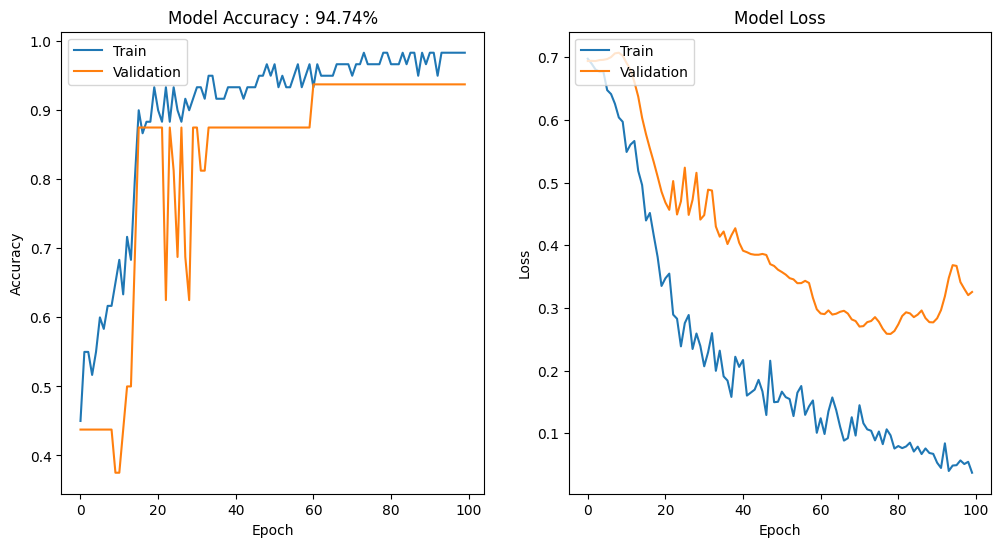

In [14]:
# Plot training and validation history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  # Add validation accuracy
plt.title(f'Model Accuracy : {accuracy*100:.2f}%')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  # Add validation loss
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Get current date and time
now = datetime.datetime.now()

# Format the date-time string as 'MMDDYYYY-HHMM'
date_time_str = now.strftime("%d%m%Y-%H%M%S")

# Save the plot with the specified name format
plt.savefig(f"hasil training/{date_time_str}.png")
plt.show()

1/1 [==============================] - 0s 33ms/step


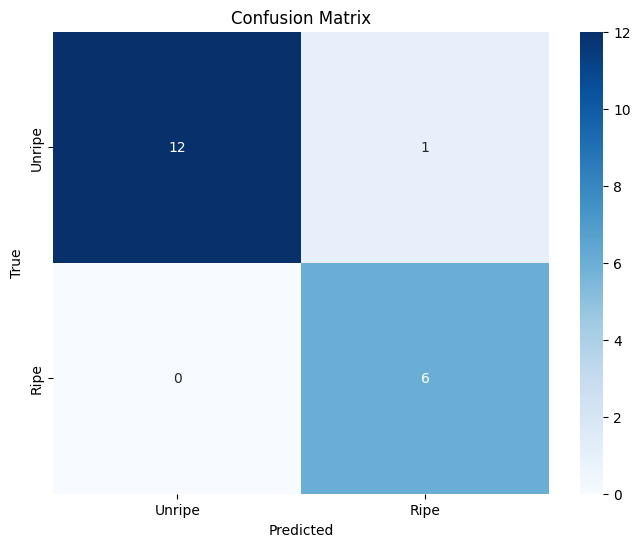

In [9]:
# Generate predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)  # Assuming it's a binary classification problem

# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Unripe', 'Ripe'], yticklabels=['Unripe', 'Ripe'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()